In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os


In [17]:
emis=['H  1  1215.67A',
'H  1  1025.72A',
'H  1  4861.33A',
'H  1  6562.81A',
'O  6  1031.91A',
'O  6  1037.62A',
'He 2  949.31A',
'He 2  972.108A',
'He 2  1025.27A',
'He 2  1640.43A',
'He 2  4859A',
'He 2  4339A',
'He 2  6529A',
'He 2  6560A',
'C  4  1550.78',
'O  3  5006.84A',
'N  5  1238.82',
'N  5  1242.80',
'c  4  1548.19',
'c  4  1550.78',
'mg 2  2795.53',
'mg 2  2802.71'
]


#'Case B'
options= [
          'stop column denstiy 24',
          'stop temperature off']

In [18]:

N = 20
rr = np.linspace(1, N, N)
# Lumin = np.linspace(35,38,N)
# Temp = np.linspace(1.00E+4,3.00E+5,N)
Hd = np.linspace(2,8,N)

Lum_Lya = np.zeros(N)
Lum_Lyb = np.zeros(N)
Lum_Ha = np.zeros(N)
Lum_Hb = np.zeros(N)
Lum_O6 = np.zeros(N)
Lum_O6_1 = np.zeros(N)
Lum_O6_2 = np.zeros(N)

Lum_O3 = np.zeros(N)

Lum_C4 = np.zeros(N)
Lum_C4_1 = np.zeros(N)
Lum_C4_2 = np.zeros(N)
Lum_N5 = np.zeros(N)
Lum_N5_1 = np.zeros(N)
Lum_N5_2 = np.zeros(N)


Lum_Mg2 = np.zeros(N)
Lum_Mg2_1 = np.zeros(N)
Lum_Mg2_2 =  np.zeros(N)

Lum_He2_949 = np.zeros(N)
Lum_He2_972 = np.zeros(N)
Lum_He2_1025 = np.zeros(N)
Lum_He2_1640 = np.zeros(N)

Lum_He2_4339 = np.zeros(N)
Lum_He2_4859 = np.zeros(N)
Lum_He2_6529 = np.zeros(N)
Lum_He2_6560 = np.zeros(N)

Nden_HI = np.zeros(N)
Nden_HII = np.zeros(N)
Nden_OVI = np.zeros(N)
Nden_NV = np.zeros(N)
Nden_CIV = np.zeros(N)
# rr = np.arange(23,101,1)
ex = []
for ii,nn in enumerate(rr):
    Mod = pc.CloudyModel(r"/home/jin/cloudy_Test/pne/hden_v_test/data_%d/data_%d"%(nn,nn))
    try:
        Lum_Lya[ii] = float(Mod.get_emis_vol('H__1_121567A'))
        Lum_Lyb[ii] = float(Mod.get_emis_vol('H__1_102572A'))
        Lum_Ha[ii] = float(Mod.get_emis_vol('H__1_656281A'))
        Lum_Hb[ii] = float(Mod.get_emis_vol('H__1_486133A'))

        Lum_O6[ii] = float(Mod.get_emis_vol('O__6_103191A')) + float(Mod.get_emis_vol('O__6_103762A'))
        Lum_O6_1[ii] = float(Mod.get_emis_vol('O__6_103191A'))
        Lum_O6_2[ii] = float(Mod.get_emis_vol('O__6_103762A'))
        
        Lum_O3[ii] = float(Mod.get_emis_vol('O__3_500684A'))

        Lum_C4[ii] = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))
        Lum_C4_1[ii] = float(Mod.get_emis_vol('C__4_154819A'))
        Lum_C4_2[ii] = float(Mod.get_emis_vol('C__4_155078A'))

        Lum_N5[ii] = float(Mod.get_emis_vol('N__5_123882A')) + float(Mod.get_emis_vol('N__5_124280A'))
        Lum_N5_1[ii] = float(Mod.get_emis_vol('N__5_123882A'))
        Lum_N5_2[ii] = float(Mod.get_emis_vol('N__5_124280A'))


        Lum_Mg2[ii] = float(Mod.get_emis_vol('MG_2_279553A'))+ float(Mod.get_emis_vol('MG_2_280271A'))
        Lum_Mg2_1[ii] = float(Mod.get_emis_vol('MG_2_279553A'))
        Lum_Mg2_2[ii] =  float(Mod.get_emis_vol('MG_2_280271A'))

        Lum_He2_949[ii] = float(Mod.get_emis_vol('HE_2_949310A'))
        Lum_He2_972[ii] = float(Mod.get_emis_vol('HE_2_972108A'))
        Lum_He2_1025[ii] = float(Mod.get_emis_vol('HE_2_102527A'))  
        Lum_He2_1640[ii] = float(Mod.get_emis_vol('HE_2_164043A'))

        Lum_He2_4339[ii] = float(Mod.get_emis_vol('HE_2_433900A'))
        Lum_He2_4859[ii] = float(Mod.get_emis_vol('HE_2_485900A'))
        Lum_He2_6529[ii] = float(Mod.get_emis_vol('HE_2_652900A'))
        Lum_He2_6560[ii] = float(Mod.get_emis_vol('HE_2_656000A'))
                             
        N_H = sum(Mod.dr*Mod.nH)
        frac_C = 2.45E-04
        frac_O = 4.90E-04
        frac_N = 8.51E-05
        frac_Mg = 3.47E-05
        N_HI = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',0))
        N_HII = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',1))
        N_OVI = frac_O*sum(Mod.dr*Mod.nH*Mod.get_ionic('O',5))
        N_NV = frac_N*sum(Mod.dr*Mod.nH*Mod.get_ionic('N',4))
        N_CIV = frac_C*sum(Mod.dr*Mod.nH*Mod.get_ionic('C',3))
        Nden_HI[ii] = N_HI
        Nden_HII[ii] = N_HII 
        Nden_OVI[ii] = N_OVI
        Nden_NV[ii] = N_NV
        Nden_CIV[ii] = N_CIV
    except AttributeError:
        ex.append(int(nn-1))
        print('error  = %d'%(nn))



warng CloudyModel /home/jin/cloudy_Test/pne/hden_v_test/data_1/data_1: Model aborted
error  = 1
warng CloudyModel /home/jin/cloudy_Test/pne/hden_v_test/data_13/data_13: Model aborted
error  = 13


In [19]:

Hd = np.delete(Hd,ex)
Lum_Lya = np.delete(Lum_Lya,ex)
Lum_Lyb = np.delete(Lum_Lyb,ex)
Lum_Ha = np.delete(Lum_Ha,ex)
Lum_Hb = np.delete(Lum_Hb,ex)


Lum_O6 = np.delete(Lum_O6,ex)
Lum_O6_1 = np.delete(Lum_O6_1,ex)
Lum_O6_2 = np.delete(Lum_O6_2,ex)

Lum_O3 = np.delete(Lum_O3,ex)

Lum_C4 = np.delete(Lum_C4,ex)
Lum_C4_1 = np.delete(Lum_C4_1,ex)
Lum_C4_2 = np.delete(Lum_C4_2,ex)

Lum_N5 = np.delete(Lum_N5,ex)
Lum_N5_1 = np.delete(Lum_N5_1,ex)
Lum_N5_2 = np.delete(Lum_N5_2,ex)


Lum_Mg2 = np.delete(Lum_Mg2,ex)
Lum_Mg2_1 = np.delete(Lum_Mg2_1,ex)
Lum_Mg2_2 =  np.delete(Lum_Mg2_2,ex)

Lum_He2_949 = np.delete(Lum_He2_949,ex) 
Lum_He2_972 = np.delete(Lum_He2_972,ex)
Lum_He2_1025 = np.delete(Lum_He2_1025,ex)
Lum_He2_1640 = np.delete(Lum_He2_1640,ex)

Lum_He2_4339 = np.delete(Lum_He2_4339,ex)
Lum_He2_4859 = np.delete(Lum_He2_4859,ex)
Lum_He2_6529 = np.delete(Lum_He2_6529,ex)
Lum_He2_6560 = np.delete(Lum_He2_6560,ex)

Nden_HI = np.delete(Nden_HI,ex)
Nden_HII = np.delete(Nden_HII,ex)
Nden_OVI = np.delete(Nden_OVI,ex)
Nden_NV = np.delete(Nden_NV,ex)
Nden_CIV = np.delete(Nden_CIV,ex)

Text(0, 0.5, 'Lumninosity')

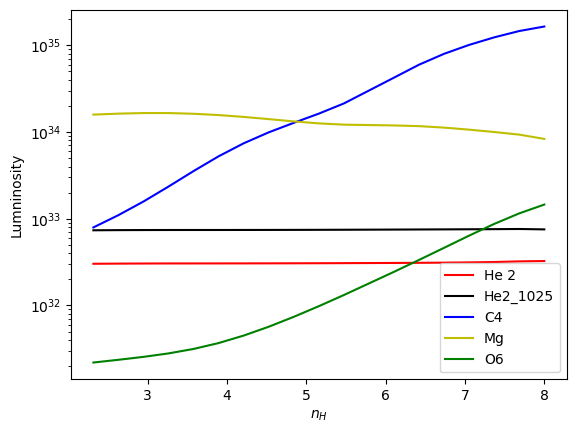

In [20]:
plt.plot(Hd,Lum_He2_972,'r',markersize=1,label='He 2')
plt.plot(Hd,Lum_He2_1025,'k',markersize=1,label='He2_1025')
plt.plot(Hd,Lum_C4,'b',markersize=1,label='C4')
plt.plot(Hd,Lum_Mg2,'y',markersize=1,label='Mg')
plt.plot(Hd,Lum_O6,'g',markersize=1,label='O6')
plt.legend()
plt.yscale('log')
plt.xlabel(r'$n_{H}$')
plt.ylabel('Lumninosity')

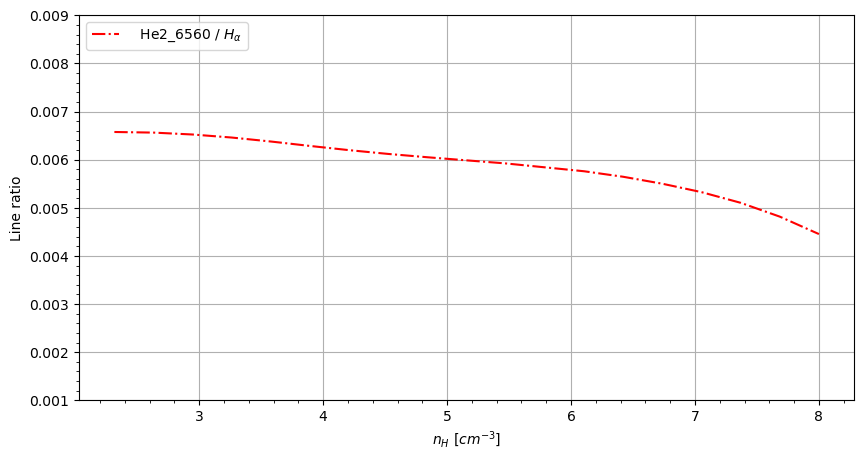

In [21]:
fig = plt.figure(1,figsize=(10,5))

# plt.subplot(121)


plt.plot(Hd,Lum_He2_6560 / Lum_Ha  ,'r-.',markersize=1,label=r'  He2_6560 / $H_{\alpha}$ ')
# plt.plot(Hd,Lum_He2_1025 / Lum_Ha  ,'r:',markersize=1,label=r'  He2_1025 / $H_{\alpha}$ ')
plt.legend(loc='upper left')
plt.ylim(0.001,0.009)
# plt.xticks(np.linspace(2.0,3.2,4))
plt.xlabel(r'$n_{H}~[cm^{-3}]$')
plt.ylabel('Line ratio')
plt.minorticks_on()
plt.grid(True)

# plt.subplot(122)

# plt.plot(Hd, Lum_He2_4859 / Lum_Hb  ,'b',markersize=1,label=r' He2_4859 / $H_{\beta}$ ')
# plt.plot(Hd, Lum_He2_972 / Lum_Hb  ,'b:',markersize=1,label=r' He2_972 / $H_{\beta}$  ')
# # plt.plot(Temp_B,Lum_Ha_B / Lum_He2_6560_B,'k',markersize=1,label='Ha / He2_6560 , case B')
# plt.legend()
# plt.grid(True)
# # plt.ylim(10,100)
# plt.xlabel(r'$n_{H}~[cm^{-3}]$')
# plt.ylabel('Line ratio')
# plt.minorticks_on()
# # plt.xticks(np.linspace(2.0,3.2,4))
# # plt.ylim(0.02,0.04)
# plt.tight_layout()

# plt.savefig('density verus Luminosity_1')

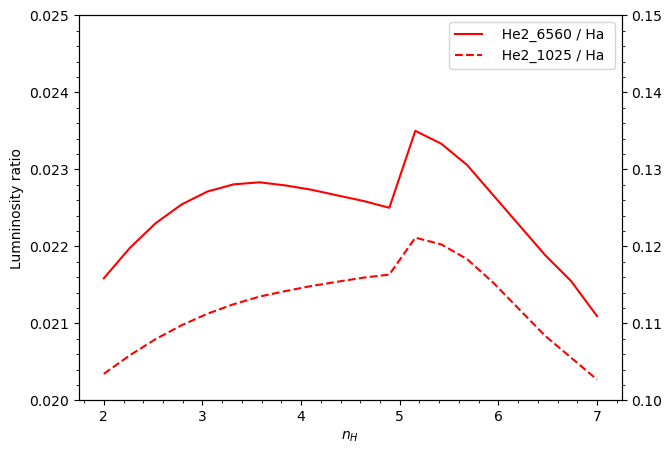

In [7]:

fig,ax1 = plt.subplots(1,figsize=(7,5))
line1 = ax1.plot(Hd,Lum_He2_6560 / Lum_Ha  ,'r',markersize=1,label='  He2_6560 / Ha ')
ax1.set_ylabel('Lumninosity ratio')
ax1.set_xlabel(r'$n_{H}$')
ax1.set_ylim(0.02,0.025)
ax1.minorticks_on()

ax2 = ax1.twinx()
line2 = ax2.plot(Hd,Lum_He2_1025 / Lum_Ha  ,'r--',markersize=1,label='  He2_1025 / Ha ')
# ax2.tick_params(axis='y',labelcolor='r')
ax2.set_ylim(0.1,0.15)

lines = line1+line2 
labels=[la.get_label() for la in lines]
plt.legend(lines,labels)

ax2.minorticks_on()
# plt.grid(True)


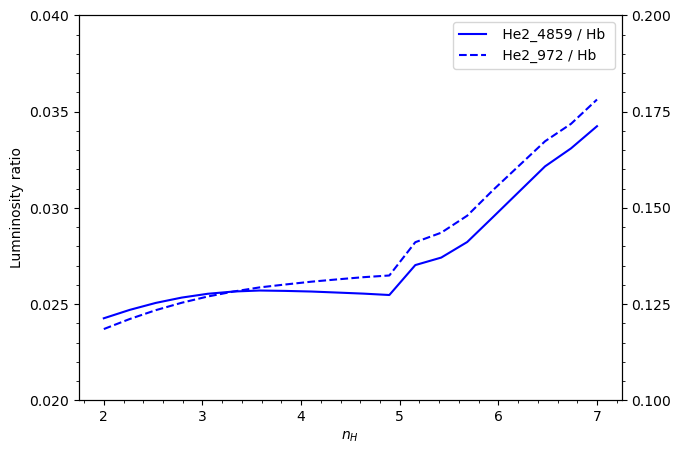

In [8]:

fig,ax1 = plt.subplots(1,figsize=(7,5))
line1 = ax1.plot(Hd, Lum_He2_4859 / Lum_Hb  ,'b',markersize=1,label=' He2_4859 / Hb ')
ax1.set_ylabel('Lumninosity ratio')
ax1.set_xlabel(r'$n_{H}$')
ax1.set_ylim(0.02,0.04)
ax1.set_yticks(np.linspace(0.02,0.04,5))
ax1.minorticks_on()

ax2 = ax1.twinx()
line2 = ax2.plot(Hd, Lum_He2_972 / Lum_Hb  ,'b--',markersize=1,label=' He2_972 / Hb ')
# ax2.tick_params(axis='y',labelcolor='r')
ax2.set_ylim(0.1 , 0.2)
ax2.set_yticks(np.linspace(0.1,0.2,5))

lines = line1+line2 
labels=[la.get_label() for la in lines]
plt.legend(lines,labels)

plt.minorticks_on()
# plt.grid(True)


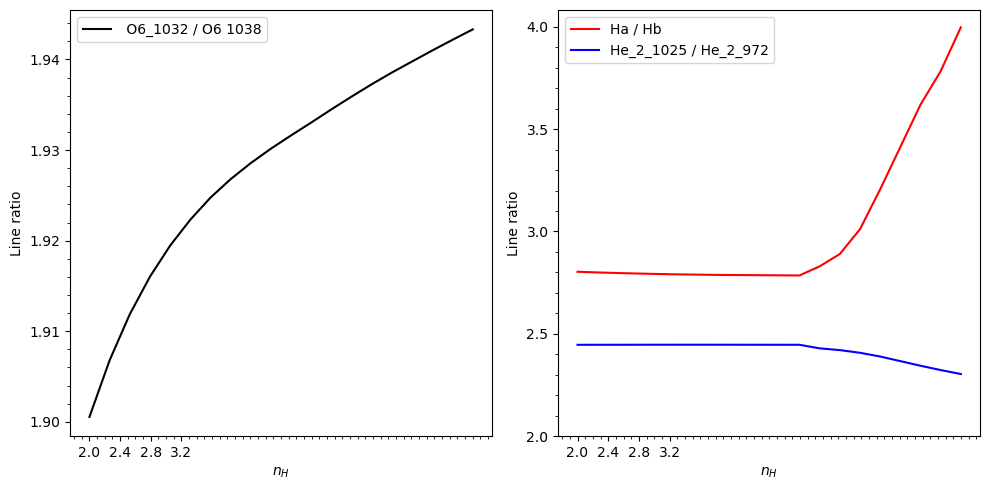

In [9]:
fig = plt.figure(1,figsize=(10,5))
plt.subplot(121)
plt.plot(Hd,Lum_O6_1 / Lum_O6_2 ,'k',markersize=1,label=' O6_1032 / O6 1038')
# plt.plot(Temp_B,Lum_O6_1_B / Lum_O6_2_B ,'k:',markersize=1,label=' O6_1032 / O6 1038 , case B')
plt.legend()
# plt.yscale('log')
plt.xlabel(r'$n_{H}$')
plt.ylabel('Line ratio')
# plt.xticks(np.linspace(35.0,38.0,4))
# plt.yticks(np.linspace(1.926,1.936,5))
plt.minorticks_on()
plt.xticks(np.linspace(2.0,3.2,4))

plt.subplot(122)

plt.plot(Hd,Lum_Ha/Lum_Hb,'r',label='Ha / Hb ')
plt.plot(Hd,Lum_He2_1025/Lum_He2_972,'b',label='He_2_1025 / He_2_972')
# plt.plot(Temp_B,Lum_Ha_B/Lum_Hb_B,'r:',label='Ha / Hb , case B ')
# plt.plot(Temp_B,Lum_He2_1025_B/Lum_He2_972_B,'b:',label='He_2_1025 / He_2_972 , case B')

# plt.ylim(2.0,3.0)
plt.xlabel(r'$n_{H}$')
plt.ylabel('Line ratio')

# plt.xticks(np.linspace(35.0,38.0,4))
# plt.yticks(np.linspace(2.0,3.0,5))
# plt.ylim(1.95,3.05)
plt.legend()

plt.minorticks_on()
plt.xticks(np.linspace(2.0,3.2,4))
plt.yticks(np.linspace(2.0,4.0,5))
plt.tight_layout()
# plt.savefig('density verus Luminosity_2')

([<matplotlib.axis.XTick at 0x7fd6472261d0>,
 [Text(2.0, 0, '2.0'),
  Text(2.4, 0, '2.4'),
  Text(2.8000000000000003, 0, '2.8'),
  Text(3.2, 0, '3.2')])

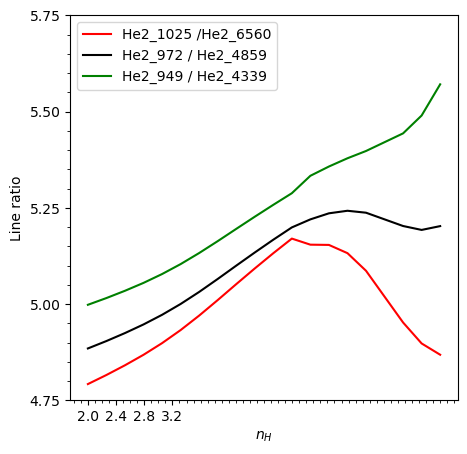

In [10]:
figure= plt.figure(1,figsize=(5,5))
# Tem_l = 100000
# Tem_h = 300000
plt.plot(Hd,Lum_He2_1025 / Lum_He2_6560 , 'r',label='He2_1025 /He2_6560')
plt.plot(Hd,Lum_He2_972 / Lum_He2_4859 , 'k', label='He2_972 / He2_4859')
plt.plot(Hd,Lum_He2_949 / Lum_He2_4339 , 'g',label='He2_949 / He2_4339')
# plt.plot(Temp_B,Lum_He2_949_B / Lum_He2_4339_B , 'g:',label='He2_949 / He2_4339,case B')
plt.legend()
plt.xlabel(r'$n_{H}$')
plt.ylabel('Line ratio')
plt.ylim(4.75,5.5)
plt.yticks(np.linspace(4.75,5.75,5))
plt.minorticks_on()
plt.xticks(np.linspace(2.0,3.2,4))

# plt.xticks(np.linspace(Tem_l,Tem_h,5))
# plt.xlim(Tem_l,Tem_h)
# plt.savefig('density verus Luminosity_3')